In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Linear Regression using all available features

In [2]:
diabetes = load_diabetes()

model = LinearRegression()
model.fit(diabetes.data, diabetes.target)

LinearRegression()

In [3]:
def adjusted_rsquared(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

rsquared = model.score(diabetes.data, diabetes.target)
adj_rsquared = adjusted_rsquared(rsquared, diabetes.data.shape[0], diabetes.data.shape[1])
print(f"R^2: {rsquared:.2f}")
print(f"Adjusted R^2: {adj_rsquared:.2f}")

R^2: 0.52
Adjusted R^2: 0.51


### BMI vs Diabetes Progession

In [12]:
bmi = diabetes.data[:, 2].reshape(-1, 1)
model.fit(bmi, diabetes.target)

rsquared = model.score(bmi, diabetes.target)
print(f"R^2: {rsquared:.2f}")

R^2: 0.34


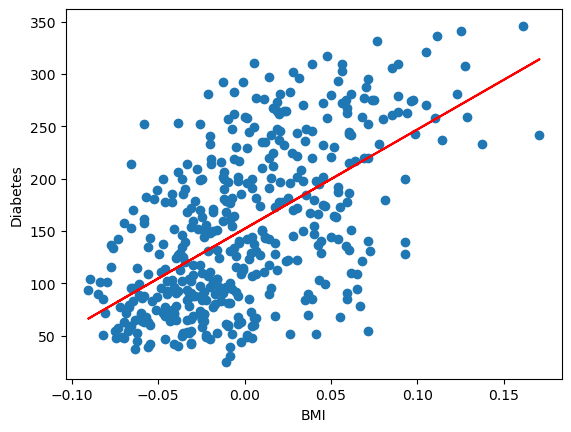

In [5]:
plt.scatter(bmi, diabetes.target)
plt.xlabel("BMI")
plt.ylabel("Diabetes")

plt.plot(bmi, model.predict(bmi), color = "red")

plt.show()

### All (feature, target) charts

R^2 for age: 0.04
R^2 for bmi: 0.34
R^2 for bp: 0.19
R^2 for s1: 0.04
R^2 for s2: 0.03
R^2 for s3: 0.16
R^2 for s4: 0.19
R^2 for s5: 0.32
R^2 for s6: 0.15


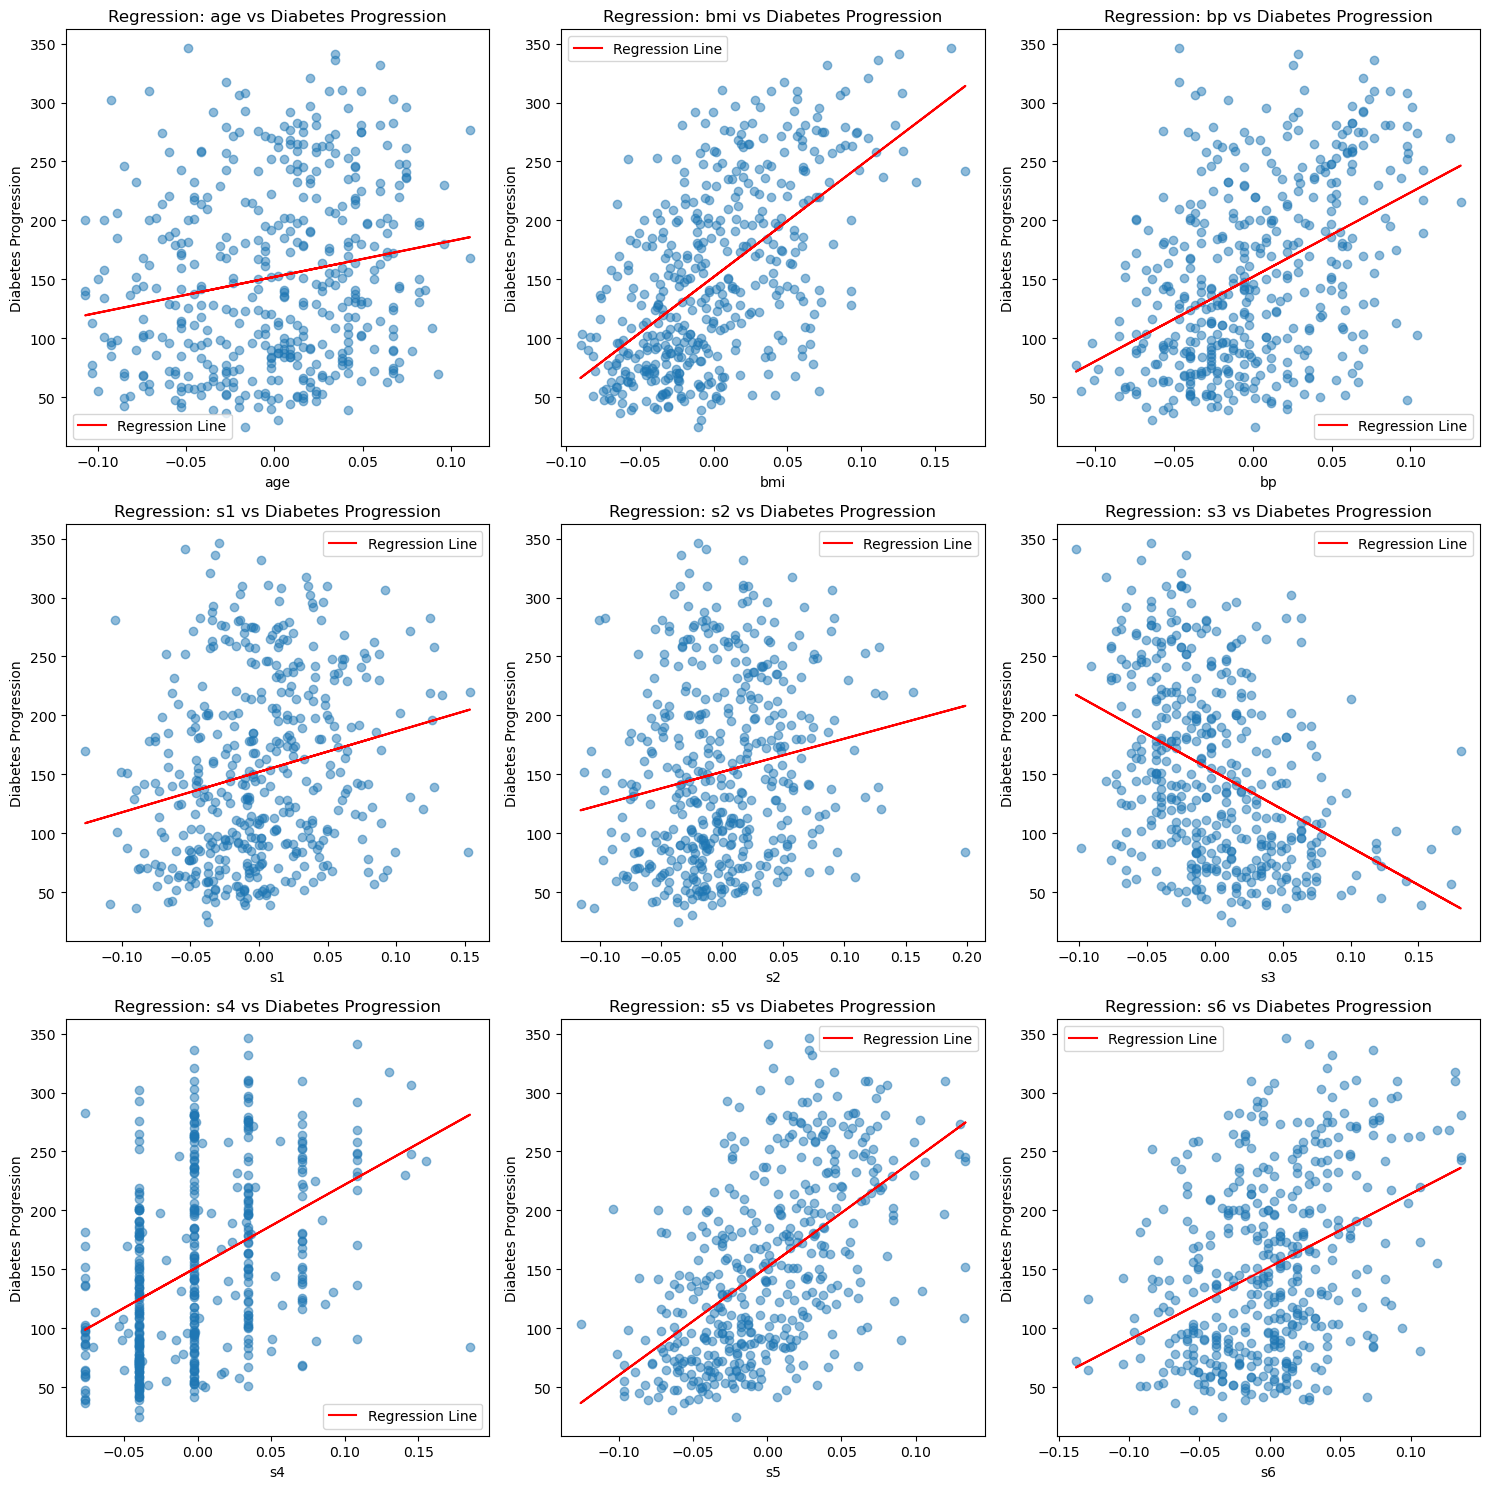

In [ ]:
num_features = len(diabetes.feature_names)

fig, axes = plt.subplots(nrows=(num_features // 3), ncols=3, figsize=(15, (num_features // 3) * 5))
axes = axes.flatten()

y = diabetes.target

# drop the sex feature (as it's categorical)
id = diabetes.feature_names.index("sex")
features = np.delete(diabetes.feature_names, id)
data = np.delete(diabetes.data, id, axis=1)

for feature_idx, feature_name in enumerate(features):
    X = data[:, feature_idx].reshape(-1, 1)

    model.fit(X, y)
    y_pred = model.predict(X)
    
    ax = axes[feature_idx]
    ax.scatter(X, y, alpha=0.5)
    ax.plot(X, y_pred, color="red", label="Regression Line")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Diabetes Progression")
    ax.set_title(f"Regression: {feature_name} vs Diabetes Progression")
    ax.legend()

    rsquared = model.score(X, y)
    print(f"R^2 for {feature_name}: {rsquared:.2f}")

plt.tight_layout()
plt.show()